In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
#import torch.nn as nn
#from torch.autograd import Variable

import pyro
import pyro.distributions as dist
from pyro.distributions import Normal

In [2]:
from emoclass import *
from preprocess_util import *

In [3]:
IMG_SIZE = 128
NUM_CLASSES = len(emocat)
folder_path = '/home/studenti/ballerini/datasets/RAVDESS_frames'
model_path = "/home/studenti/ballerini/Multimodal_RSA/src/emoclassmodel.pth"

In [4]:
model = EmoClassCNN(IMG_SIZE, NUM_CLASSES).double()
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

Label:  happy
Prediction:  happy
(tensor(0.8512), tensor(0.1106))


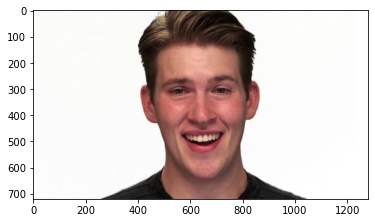

In [31]:
cat = emocat[2]
image = getEmotionImage(folder_path, cat)

pred = predict(model, image, IMG_SIZE)

print('Label: ', cat)
print('Prediction: ', emocat[pred])

ca_loc = torch.tensor(EMOTION_CORE_AFFECT_MAP_LOC[emocat[pred]])
ca_dev = torch.tensor(EMOTION_CORE_AFFECT_MAP_STD_DEV[emocat[pred]])

plt.imshow(image)

valence_dist = Normal(ca_loc[0], ca_dev[0])
arousal_dist = Normal(ca_loc[1], ca_dev[1])

VA = (valence_dist.sample(), arousal_dist.sample())
print(VA)

In [32]:
V = (VA[0] - (-1)) / (1 - (-1))
A = (VA[1] - (-1)) / (1 - (-1))

print('valence', V, ' arousal', A)

valence tensor(0.9256)  arousal tensor(0.5553)
